## **Характер и особенности задержек авиарейсов**

*Задача*: увидеть проблемные точки и способствовать принятию решений по их устранению.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [67]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/flights.csv')
df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


# **1. Количество задержек по дням недели**

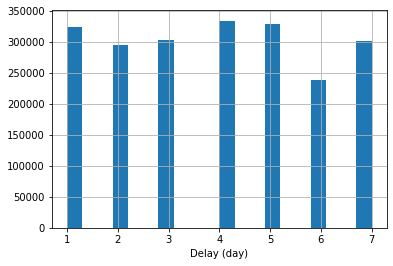

In [17]:
fig = plt.figure()
fig.patch.set_facecolor('xkcd:white')

day_week = df.loc[df.DEPARTURE_DELAY > 0, 'DAY_OF_WEEK']
day_week.hist(bins=20, range=(1, 7))
plt.xlabel('Delay (day)')
plt.show()

День недели, в который происходит максимум задержек:

In [21]:
print(day_week[ :1].max())

4


# **2. Количество задержек по авиакомпаниям**

WN    566807
DL    282463
UA    256550
AA    245904
OO    171572
EV    169897
B6    102061
MQ     93726
US     62565
NK     52089
AS     43566
F9     34893
VX     23379
HA     20146
Name: AIRLINE, dtype: int64


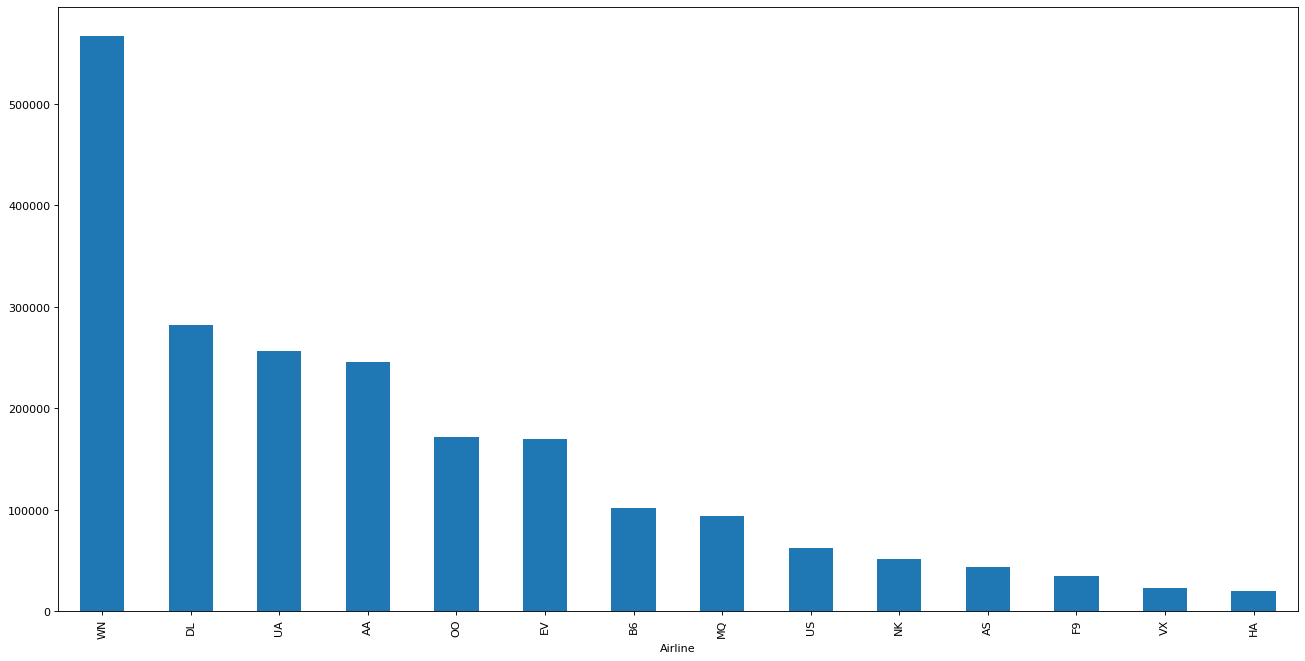

In [87]:
av_delay = df.loc[df.DEPARTURE_DELAY > 0, 'AIRLINE'].value_counts()
print(av_delay)

fig = plt.figure(figsize=(20, 10), dpi=80)
fig.patch.set_facecolor('xkcd:white')

df.loc[df.DEPARTURE_DELAY > 0, 'AIRLINE'].value_counts()[:20].plot(kind='bar')
plt.xlabel('Airline')
plt.show()

Компания с максимальным числом задержек:

In [25]:
max = av_delay.max()
av_delay.loc[av_delay == max]

WN    566807
Name: AIRLINE, dtype: int64

# **3. Количество задержек по месяцам**

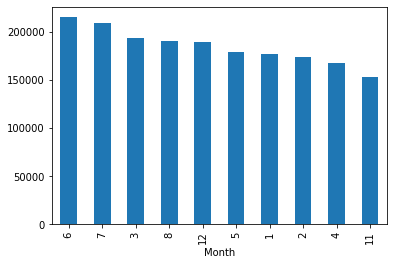

In [35]:
mon_delay = df.loc[df.DEPARTURE_DELAY > 0, 'MONTH'].value_counts()
fig = plt.figure()
fig.patch.set_facecolor('xkcd:white')

df.loc[df.DEPARTURE_DELAY > 0, 'MONTH'].value_counts()[:10].plot(kind='bar')
plt.xlabel('Month')
plt.show()

Месяц с самым большим количеством задержек:

In [33]:
max = mon_delay.max()
mon_delay.loc[mon_delay == max]

6    215381
Name: MONTH, dtype: int64

# **4. Причины отмены рейсов**

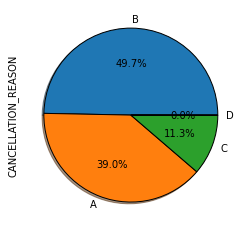

In [82]:
vals = df.loc[df.DEPARTURE_DELAY > 0, 'CANCELLATION_REASON'].value_counts()
df.loc[df.DEPARTURE_DELAY > 0, 'CANCELLATION_REASON'].value_counts()[:10].plot(kind='pie', autopct='%1.1f%%', shadow=True, wedgeprops={'lw':1, 'ls':'-','edgecolor':"k"})

Основная причина отмены рейсов:

In [70]:
max = vals.max()
vals.loc[vals == max]

B    1262
Name: CANCELLATION_REASON, dtype: int64

# **5. Пункты вылета с максимальным числом задержек**

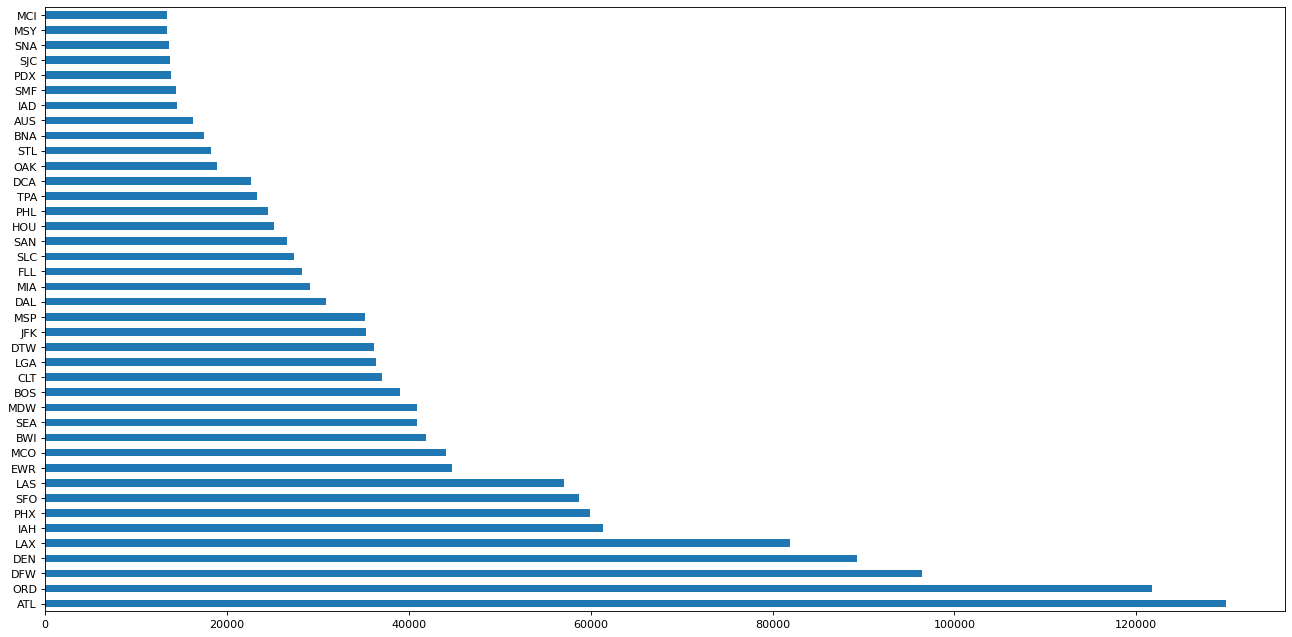

In [88]:
p_delay = df.loc[df.DEPARTURE_DELAY > 0, 'ORIGIN_AIRPORT'].value_counts()
fig = plt.figure(figsize=(20, 10), dpi=80)
fig.patch.set_facecolor('xkcd:white')

df.loc[df.DEPARTURE_DELAY > 0, 'ORIGIN_AIRPORT'].value_counts()[:40].plot(kind='barh')
plt.show()

Аэропорт с максимальным числом задержек рейса:

In [89]:
max = p_delay.max()
p_delay.loc[p_delay == max]

ATL    129846
Name: ORIGIN_AIRPORT, dtype: int64


# **6. В какие месяцы происходит максимальное число задержек из-за погоды?**

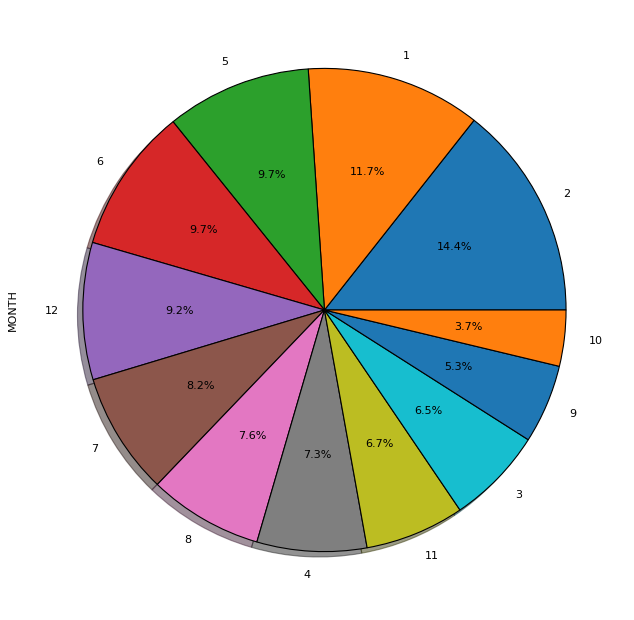

In [104]:
pt = df.loc[df.WEATHER_DELAY == True, 'MONTH'].value_counts()
fig = plt.figure(figsize=(20, 10), dpi=80)
fig.patch.set_facecolor('xkcd:white')

df.loc[df.WEATHER_DELAY == True, 'MONTH'].value_counts().plot(kind='pie', autopct='%1.1f%%', shadow=True, wedgeprops={'lw':1, 'ls':'-','edgecolor':"k"})
plt.show()

Месяц с наибольшим количеством задержек:

In [105]:
pt[:1]

2    188
Name: MONTH, dtype: int64

# **7. Дни недели с макимальным числом задержек по техническим причинам**

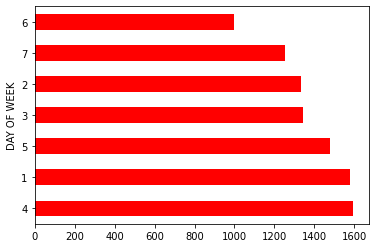

In [131]:
dt = df.loc[df.LATE_AIRCRAFT_DELAY == True, 'DAY_OF_WEEK'].value_counts()
fig = plt.figure()
fig.patch.set_facecolor('xkcd:white')

df.loc[df.LATE_AIRCRAFT_DELAY == True, 'DAY_OF_WEEK'].value_counts().plot(kind='barh', color='red')

plt.ylabel('DAY OF WEEK')
plt.show()

День недели с максимальным числом задержек по техническим причинам:

In [114]:
dt[:1]

7    20
Name: DAY_OF_WEEK, dtype: int64

# **8. Дни недели с макимальным числом задержек по причине обеспечения безопасности**

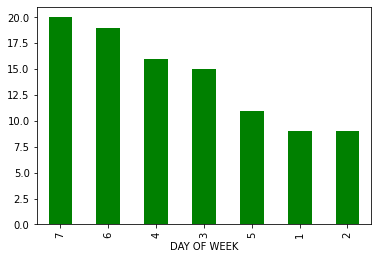

In [127]:
ft = df.loc[df.SECURITY_DELAY == True, 'DAY_OF_WEEK'].value_counts()
fig = plt.figure()
fig.patch.set_facecolor('xkcd:white')

df.loc[df.SECURITY_DELAY == True, 'DAY_OF_WEEK'].value_counts().plot(kind='bar', color='green')

plt.xlabel('DAY OF WEEK')
plt.show()

День недели с максимальным числом задержек по причинам безопасности:

In [128]:
ft[:1]

7    20
Name: DAY_OF_WEEK, dtype: int64

# **9. Задержки авиарейсов в зависимости от местоположения населенных пунктов**

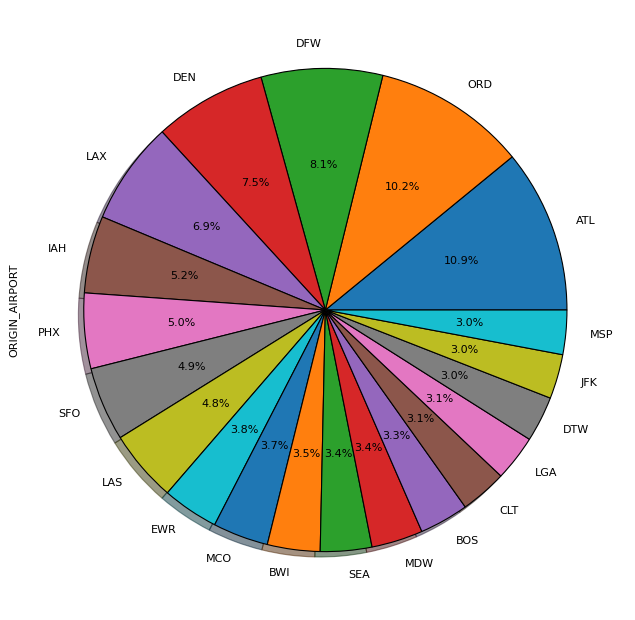

In [143]:
fig = plt.figure(figsize=(20, 10), dpi=80)
fig.patch.set_facecolor('xkcd:white')
df.loc[df.DEPARTURE_DELAY > 0, 'ORIGIN_AIRPORT'].value_counts()[:20].plot(kind='pie', autopct='%1.1f%%', shadow=True, wedgeprops={'lw':1, 'ls':'-','edgecolor':"k"})
plt.show()

# **10. Общее число задержек авиарейсов за год**

In [150]:
df.loc[df.DEPARTURE_DELAY > 0, 'DEPARTURE_DELAY'].value_counts().sum()

2125618

# **Выводы**

1) Самый "сложный" день недели в плане задержек рейсов - **четверг**;

2) Самая "опаздывающая" компания - **WN**;

3) **ATL** - аэропорт с наибольшим количеством задержек рейсов;

4) В **феврале** чаще всего происходят задержки рейсов из-за погоды;

5) Основная причина отмены рейсов - **B**.